In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nb-dataset-desember/update dataset 3000 terbaru desember terbaru.xlsx
/kaggle/input/dataset-whatsapp/whatsapp_reviews (1).csv
/kaggle/input/3000-data-naive-bayes/update dataset 3000 terbaru.xlsx
/kaggle/input/algoritma-multinomial-naive-bayes/update dataset 3000 terbaru desember.xlsx
/kaggle/input/10000-data/whatsapp_reviews_2024_ordered.csv
/kaggle/input/project-pemodelan/project pemodelan.xlsx
/kaggle/input/review-whatsapp/negative_reviews_2024-terbaruyyy.xlsx
/kaggle/input/nb-3000-dataset/update dataset 3000.xlsx
/kaggle/input/dataset-wattpad-naive-bayes-3000/update dataset 3000 terbaru.xlsx


In [2]:
import pandas as pd

# Memuat dataset
df = pd.read_excel('/kaggle/input/project-pemodelan/project pemodelan.xlsx')

# Menampilkan 5 baris pertama dataset
(df.head())


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6d636588-8b51-4c17-b4bd-039932ae5f06,Yanti Viaaa,https://play-lh.googleusercontent.com/a/ACg8oc...,Nyaman sangat cocok buat obrolan,5,0,2.24.24.79,12/13/2024 14:54,NaN,NaN,2.24.24.79
1,7b0e452f-4e6d-405d-955b-30848f6c0ad5,Johan Johandi,https://play-lh.googleusercontent.com/a/ACg8oc...,WhatsApp memberi saya kebebasan dalam mengatur...,5,0,NaN,12/13/2024 14:53,NaN,NaN,NaN
2,53b01eed-4e17-4f4b-977e-53a48d7e941f,Muhamad Rizki,https://play-lh.googleusercontent.com/a/ACg8oc...,WhatsApp sangat membantu saya dalam menjaga ko...,5,0,2.24.24.79,12/13/2024 14:53,NaN,NaN,2.24.24.79
3,f000bbe0-31d8-4110-ac58-29b2545d5684,Nurul Fatiha,https://play-lh.googleusercontent.com/a-/ALV-U...,WhatsApp membantu memperkuat ikatan antara kel...,5,0,2.24.24.77,12/13/2024 14:53,NaN,NaN,2.24.24.77
4,5b562ab0-6105-4b6a-b48e-42f3c9179dd1,Renan abrizam8,https://play-lh.googleusercontent.com/a/ACg8oc...,WhatsApp memungkinkan saya untuk berbagi file ...,5,0,2.24.24.79,12/13/2024 14:52,NaN,NaN,2.24.24.79


In [3]:
# Informasi dataset (jumlah baris, kolom, tipe data)
print(df.info())

# Statistik deskriptif (untuk kolom numerik)
print(df.describe())

# Melihat nama kolom
print(df.columns)

# Mengecek nilai kosong
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              2000 non-null   object 
 1   userName              2000 non-null   object 
 2   userImage             2000 non-null   object 
 3   content               1988 non-null   object 
 4   score                 2000 non-null   int64  
 5   thumbsUpCount         2000 non-null   int64  
 6   reviewCreatedVersion  1698 non-null   object 
 7   at                    2000 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            1698 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB
None
           score  thumbsUpCount  replyContent  repliedAt
count  2000.0000    2000.000000           0.0        0.0
mean      3.0000       4.665000           NaN  

In [4]:
print(df.columns)  # Tampilkan semua kolom di dataset


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [5]:
# ambil kolom yg dibutuhkan
df = df.loc[:, ['content', 'score']]

df.head()

,content,score
0,Nyaman sangat cocok buat obrolan,5
1,WhatsApp memberi saya kebebasan dalam mengatur...,5
2,WhatsApp sangat membantu saya dalam menjaga ko...,5
3,WhatsApp membantu memperkuat ikatan antara kel...,5
4,WhatsApp memungkinkan saya untuk berbagi file ...,5


In [6]:
print(df.head())


                                             content  score
0                   Nyaman sangat cocok buat obrolan      5
1  WhatsApp memberi saya kebebasan dalam mengatur...      5
2  WhatsApp sangat membantu saya dalam menjaga ko...      5
3  WhatsApp membantu memperkuat ikatan antara kel...      5
4  WhatsApp memungkinkan saya untuk berbagi file ...      5


In [7]:
print(df.columns)


Index(['content', 'score'], dtype='object')


In [8]:
# proses case folding

df['caseFolding'] = df['content'].str.lower()
df

,content,score,caseFolding
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...
...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa
1997,jelek kualitas nya,1,jelek kualitas nya
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug


In [9]:
df['caseFolding'] = df['content'].str.lower()


In [10]:
print(df.columns)


Index(['content', 'score', 'caseFolding'], dtype='object')


In [11]:
df['caseFolding'] = df['caseFolding'].fillna('')  # Mengganti NaN dengan string kosong


In [12]:
df['caseFolding'] = df['caseFolding'].astype(str)


In [13]:
# cleaning
import string
import re

def cleaning(content):

  #remove ascii
  content = content.encode('ascii', 'replace').decode('ascii')
  #remove angka
  content = re.sub('[0-9]+', '', content)
  #remove mention, link, hashtag
  content = re.sub('<br.*?>(.+?)</br>','',content)
  content = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", content).split())
  content = re.sub('@[^\s]+','', content)
  #remove url
  content = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)(?:(?:\/[^\s/]))*', '', content)
  #remove tanda baca
  content = re.sub(r'[^\w\d\s]+', '', content)
  #remove whitespace
  content = re.sub('\s+',' ',content)


  return content
df['cleaning'] = df['caseFolding'].apply(cleaning)
df


,content,score,caseFolding,cleaning
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...
...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Unduh tokenizer jika belum ada
nltk.download('punkt')

# Fungsi untuk tokenisasi
def tokenize(text):
  tokens = text.split()
  return tokens

# Terapkan tokenisasi ke kolom 'comment'
df['tokenizing'] = df['cleaning'].astype(str).apply(tokenize)

# Tampilkan DataFrame setelah tokenisasi
df


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,caseFolding,cleaning,tokenizing
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan,"[nyaman, sangat, cocok, buat, obrolan]"
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...,"[whatsapp, memberi, saya, kebebasan, dalam, me..."
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...,"[whatsapp, sangat, membantu, saya, dalam, menj..."
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...,"[whatsapp, membantu, memperkuat, ikatan, antar..."
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...,"[whatsapp, memungkinkan, saya, untuk, berbagi,..."
...,...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...,"[tolong, fokuskan, untuk, perbaiki, bug, dan, ..."
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa,"[saya, belum, mendapatkan, meta, ai, kecewa]"
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya,"[jelek, kualitas, nya]"
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug,"[sangat, buruk, sih, setelah, di, update, seri..."


In [15]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.3 MB/s eta 0:00:00


In [16]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)
df['stemming'] = df['tokenizing'].apply(lambda x : [stemmer.stem(y) for y in x])
df

,content,score,caseFolding,cleaning,tokenizing,stemming
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan,"[nyaman, sangat, cocok, buat, obrolan]","[nyaman, sangat, cocok, buat, obrol]"
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...,"[whatsapp, memberi, saya, kebebasan, dalam, me...","[whatsapp, beri, saya, bebas, dalam, atur, sia..."
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...,"[whatsapp, sangat, membantu, saya, dalam, menj...","[whatsapp, sangat, bantu, saya, dalam, jaga, k..."
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...,"[whatsapp, membantu, memperkuat, ikatan, antar...","[whatsapp, bantu, kuat, ikat, antara, keluarga..."
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...,"[whatsapp, memungkinkan, saya, untuk, berbagi,...","[whatsapp, mungkin, saya, untuk, bagi, file, k..."
...,...,...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...,"[tolong, fokuskan, untuk, perbaiki, bug, dan, ...","[tolong, fokus, untuk, baik, bug, dan, masalah..."
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa,"[saya, belum, mendapatkan, meta, ai, kecewa]","[saya, belum, dapat, meta, ai, kecewa]"
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya,"[jelek, kualitas, nya]","[jelek, kualitas, nya]"
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug,"[sangat, buruk, sih, setelah, di, update, seri...","[sangat, buruk, sih, telah, di, update, sering..."


In [17]:
import nltk
from nltk.corpus import stopwords

# Unduh stopwords jika belum diunduh
nltk.download('stopwords')

# Ambil daftar stopwords bahasa Indonesia
stop_words = set([
    'diatas', 'ke', 'mending', 'masa', 'tuh', 'kw', 'selalu', 'ngga', 'tersedia', 'gapapa', 'angin', 'oke', 'muncul', 'ikut',
    'authornya', 'yang', 'saya', 'ganggu', 'ngerti', 'dah', 'ku', 'pada', 'seri', 'tolong', 'bagai', 'orang', 'paksa', 'ulang',
    'kan', 'via', 'up', 'foto', 'moodmalah', 'kayak', 'taikkorang', 'huhuhu', 'maksud', 'gak', 'x', 'sumpah', 'heran', 'cus',
    'apapun', 'aaaaaaa', 'bangettt', 'mlutolong', 'kalo', 'yg', 'tros', 'nyata', 'heh', 'bom', 'sihh', 'bajir', 'bada', 'cerita',
    'banyak', 'beli', 'dulu', 'versi', 'sekarang', 'username', 'emang', 'mungkin', 'buat', 'update', 'lebih', 'sekali', 'kepala',
    'pusing', 'apasih', 'cma', 'bner', 'shopee', 'nuryadi', 'bambu', 'hape', 'tlong', 'trus', 'beter', 'kenapaaaa', 'lanjutin', 'ibu',
    'seee', 'lup', 'batuk', 'pemirsa', 'oiii', 'woiiiiiii', 'ngabisah', 'muluklo', 'lgbaru', 'pliss', 'gjls', 'nggk', 'padahl',
    'tibatiba', 'gituu', 'gpp', 'ihh', 'klo', 'yaa', 'dehhh', 'kpn', 'kyk', 'ttt', 'samsek', 'plis', 'lahh', 'ngidupin',
    'behhhh', 'min', 'tambah', 'blom', 'uninstal', 'terlalu', 'lama', 'ato', 'bolak', 'balik', 'mau', 'kata', 'address', 'terdonlot',
    'seru', 'nma', 'woiiiiii', 'luuuuuu', 'tungguuuuu', 'pokok', 'abiss', 'skli', 'bnyk', 'hrs', 'disni', 'slalu', 'bagi', 'gabut',
    'anddd', 'bang', 'bakal', 'menyesal', 'dah', 'ini', 'jadi', 'dengan', 'sy', 'dan', 'deh', 'bgt', 'tch', 'beri', 'dislaik', 'eh',
    'bgtu', 'udah', 'gmn', 'krn', 'dpt', 'dr', 'utk', 'td', 'dgn', 'aj', 'pdhl', 'bkn', 'cm', 'btw', 'pls', 'sbnr', 'ttg', 'mnt', 'org',
    'msh', 'tpn', 'dlu', 'kn', 'kl', 'ntar', 'knp', 'ny', 'tp', 'yg', 'ap', 'trs2', 'py', 'kmrn', 'klau', 'hny', 'plng', 'mslh', 'sb',
    'ok', 'ntr', 'skrg', 'tmn', 'bsk', 'trkdng', 'kt', 'gw', 'lo', 'blg', 'mgkn', 'smg', 'dmn', 'blm', 'smua', 'lumayan', 'tb', 'klr',
    'mas', 'apknya', 'kmn', 'ygn', 'br', 'blng', 'tmpt', 'mjdi', 'spt', 'bln', 'ckp', 'lbh', 'mjg', 'wkt', 'krm', 'kgk', 'pgn', 'brg',
    'smpt', 'biji', 'sgn', 'gue', 'pd', 'nggak', 'aj', 'kpd', 'ndk', 'bnyak', 'bngt', 'crita', 'kamu', 'dia', 'kita', 'mereka', 'itu', 'sana',
    'sini', 'situ', 'tersebut', 'tersebutlah', 'seseorang', 'sesuatu', 'suatu', 'saja', 'hanya', 'lah', 'beuhh', 'dong', 'nah', 'ya',
    'iya', 'pun', 'tapi', 'lagi', 'malah', 'padahal', 'walaupun', 'meskipun', 'kan', 'yaa', 'sehingga', 'supaya', 'apakah', 'yakni',
    'karena', 'daripada', 'sejak', 'hingga', 'agar', 'apabila', 'ataupun', 'kecuali', 'bahkan', 'yaitu', 'lho', 'kok', 'toh', 'loh',
    'oh', 'iyalah', 'jadinya', 'nih', 'sebelumnya', 'setelahnya', 'sekitar', 'nanti', 'sekarang', 'hampir', 'sudah', 'belum', 'akan',
    'masih', 'pernah', 'baru', 'bisa', 'memang', 'sangat', 'amat', 'begitu', 'woy', 'nya', 'harus', 'juga', 'kalau', 'jika', 'bila',
    'mana', 'sihhhhh', 'ni', 'semakin', 'oleh', 'tanpa', 'yaaa', 'bro', 'aduhh', 'cenah', 'naik', 'haji', 'aing', 'mah', 'ko', 'sela', 'lh', 'apa', 'dalam',
    'luar', 'rada', 'ber', 'men', 'atas', 'bawah', 'ng', 'depan', 'belakang', 'chp', 'untuk', 'offline', 'banyak', 'banget', 'itulah', 'pokoknya', 'kami', 'kita',
    'lengkap', 'genre', 'sekali', 'bintang', 'soalnya', 'disini', 'diskon', 'si', 'menulis', 'gratis', 'hahah', 'hati-hati', 'berat', 'gue',
    'mau', 'yah', 'aduh', 'ada', 'terjemah', 'alih', 'pas', 'gilir', 'tiap', 'hari', 'tetep', 'mungkin', 'paling', 'biasa', 'atau', 'tahu', 'saya', 'gw', 'gua', 'aku',
    'semua', 'se', 'masuk', 'ulang', 'bikin', 'sampai', 'coba', 'parah', 'jangan', 'mulai', 'bet', 'sering', 'cuman', 'mohon', 'maaf', 'secepat',
    'betul', 'gimana', 'kah', 'di', 'sama', 'segera', 'lamalama', 'suruh', 'koin', 'saja', 'tidak tau','doang','karena', 'uninstall', 'download', 'akhir', 'pihak',
    'yaatau', 'nge',

])


# Fungsi untuk menghapus stopwords
def stopwords_removal(text):
    return [word for word in text if word not in stop_words]

# Terapkan fungsi stopwords removal pada kolom 'stemming'
df['stopwords_removal'] = df['stemming'].apply(stopwords_removal)

# Tampilkan DataFrame setelah stopwords removal
df

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,caseFolding,cleaning,tokenizing,stemming,stopwords_removal
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan,"[nyaman, sangat, cocok, buat, obrolan]","[nyaman, sangat, cocok, buat, obrol]","[nyaman, cocok, obrol]"
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...,"[whatsapp, memberi, saya, kebebasan, dalam, me...","[whatsapp, beri, saya, bebas, dalam, atur, sia...","[whatsapp, bebas, atur, siapa, lihat, status]"
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...,"[whatsapp, sangat, membantu, saya, dalam, menj...","[whatsapp, sangat, bantu, saya, dalam, jaga, k...","[whatsapp, bantu, jaga, komunikasi, tetap, jag..."
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...,"[whatsapp, membantu, memperkuat, ikatan, antar...","[whatsapp, bantu, kuat, ikat, antara, keluarga...","[whatsapp, bantu, kuat, ikat, antara, keluarga..."
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...,"[whatsapp, memungkinkan, saya, untuk, berbagi,...","[whatsapp, mungkin, saya, untuk, bagi, file, k...","[whatsapp, file, kerja, cepat, aman]"
...,...,...,...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...,"[tolong, fokuskan, untuk, perbaiki, bug, dan, ...","[tolong, fokus, untuk, baik, bug, dan, masalah...","[fokus, baik, bug, masalah, lain, nyaman, guna..."
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa,"[saya, belum, mendapatkan, meta, ai, kecewa]","[saya, belum, dapat, meta, ai, kecewa]","[dapat, meta, ai, kecewa]"
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya,"[jelek, kualitas, nya]","[jelek, kualitas, nya]","[jelek, kualitas]"
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug,"[sangat, buruk, sih, setelah, di, update, seri...","[sangat, buruk, sih, telah, di, update, sering...","[buruk, sih, telah, bug]"


In [18]:
# Kamus normalisasi
normalization_dict = {
"wa": "whatsapp", "poto":"foto", "tetep":"tetap", "loding": "lambat", "lot":"lambat", "gilak": "gila","gk": "tidak", "udh": "sudah", "logingagal":"login gagal", "abis": "habis", "kalo": "kalau", "baget": "sekali", 
"beraturannn": "beraturan", "begete":"sekali", "bug": "error", "eror": "error", "bgtt": "banget", "ngotak":"pikir", "bangett": "sekali", 
"udahmasuk": "sudah masuk", "apa²": "apa-apa", "apk": "aplikasi", "udah": "sudah", "bgt": "sekali", "syukaa": "suka", "aplikasinya":"aplikasi",
"bangett": "sekali", "ga": "tidak", "bbrp": "beberapa", "trs": "terus", "jd": "jadi", "sm": "sama", "tdk": "tidak", "baguss":"bagus",
"dlm": "dalam", "enggak":"tidak", "lg": "lagi", "engak":"tidak", "nggak": "tidak", "dg": "dengan", "bs": "bisa", "knp": "kenapa", "ny": "nya", "crottt": "", 
"tp": "tetapi", "loginnn":"login", "bnr":"benar", "yg": "yang", "nyesel": "menyesal", "krn": "karena", "sih": "saja", "dpt": "dapat", "dr": "dari", "utk": "untuk", 
"td": "tadi", "bukak":"buka", "pastiii":"pasti", "trsss":"terus", "masukkan":"masuk", "dgn": "dengan", "aj": "saja", "sy": "saya", "pdhl": "padahal", "bkn": "bukan", "ap": "apa", "cm": "hanya", 
"btw": "by the way", "mencuri":"curi", "updet":"update", "watshapp":"whatsapp", "whatsappp":"whatsapp", "semuaa":"semua", "sampe":"sampai", "pls": "tolong", "sbnr": "sebenarnya", "ttg": "tentang", "mnt": "menit", "org": "orang", "msh": "masih", 
"tpn": "tetapi", "sam":"sama", "pencet":"tekan", "dlu": "dulu", "kn": "kan", "kl": "kalau", "ntar": "nanti", "trs2": "terus-terusan", "py": "punya", 
"kmrn": "kemarin", "tauk":"tau", "nyebelin":"menjengkelkan", "klau": "kalau", "hny": "hanya", "plng": "paling", "mslh": "masalah", "sb": "sebab", "ok": "oke", 
"ntr": "nanti", "skrg": "sekarang", "tmn": "teman", "bsk": "besok", "trkdng": "terkadang", "kt": "kita", "gw": "saya", "meyenangkan":"menyenangkan",
"lo": "kamu", "kren":"keren", "blg": "bilang", "mgkn": "mungkin", "seringgg":"sering", "smg": "semoga", "dmn": "dimana", "blm": "belum", "bgtu": "begitu", 
"smua": "semua", "lumayan": "cukup", "nyesel": "menyesal", "mengembalikan":"kembali", "tb": "tiba", "klr": "keluar", "mas": "masalah", "bgtt": "bangett", 
"aku": "saya", "emng":"memang", "bangett": "sekali", "apknya": "aplikasi", "sukaa": "suka", "banget": "sekali", "bangettsekali": "sekali", "mlh":"malah", "bgs":"bagus",
"kmn": "kemana", "apaan":"apa", "ygn": "yang", "gmn": "bagaimana", "br": "baru", "blng": "bilang", "tmpt": "tempat", "mjdi": "menjadi", 
"spt": "seperti", "mlh":"malah", "bln": "bulan", "ckp": "cukup", "lbh": "lebih", "mjg": "maju", "wkt": "waktu", "krm": "kirim", "mkin":"semakin", "sekrng":"sekarang",
"kgk": "tidak", "pgn": "ingin", "brg": "barang", "smpt": "sempat", "sgn": "segenap", "gw": "saya", "gue": "saya", "baguslah":"bagus",
"pd": "pada", "tungguin":"tunggu", "ga": "tidak", "ban":"banned", "gak": "tidak", "nggak": "tidak", "aja": "saja", "dpt": "dapat", "skrg": "sekarang", 
"dgn": "dengan", "kpd": "kepada", "dr": "dari", "ndk": "tidak", "sy": "saya", "bangt": "banget", "asri": "cantik", "inimohon":"ini mohon",
"kerennn": "keren", "bnyak": "banyak", "bngt": "banget", "bnget": "sekali", "crita": "cerita", "iklanya":"iklan", "karna":"karena", "bagussekali":"bagus sekali",
"poolll":"sekali", "ngak":"tidak","hisa":"bisa", "gatau":"tidak tau", "trus":"terus", "book":"buku", "ilang":"hilang", "bisain":"buat jadi bisa",
"nambahi":"menambahkan", "dipublish":"di publish", "wattpay":"wattpad", "cuman":"hanya", "sekaran":"sekarang", "sekar":"sekarang", "makin":"semakin",
"log out":"keluar", "ku":"saya", "apk":"aplikasi", "app":"aplikasi", "krna":"karena", "nyimpen":"simpan", "sisain":"sisa", "gin":"begini", "temanteman":"teman teman",
"males":"malas", "gabisa":"tidak bisa", "okeee":"ok", "pke":"pakai", "bener":"benar", "ajeee":"saja", "daptar":"daftar", "gimana":"bagaimana", "kliatan":"kelihatan", "ttp":"tetap",
"loginnnnnn":"login", "jaman":"zaman", "apaaa":"apa", "tiap":"setiap", "seruuu":"seru", "beranta":"berantakan", "jaring":"jaringan", "apaaan":"apa",
"gabisa":"tidak bisa", "benarbenar":"benar benar", "keran":"keren", "banyakk":"banyak", "lucuk":"lucu", "notifnya":"notif", "kurangin":"kurangi", "bangett":"banget", "bgtt":"sekali", "buanyakkkkkk":"banyak", "lagiii":"lagi", "guna":"berguna", "gitu":"begitu", "tpi":"tapi", "log in":"login", "ngebug":"error", "memo":"memori", "awl":"awal", "gbs":"tidak bisa", "terbaikkkkk":"terbaik", "mantapp":"mantap", "sukaakkk":"suka", "nambahin":"tambah",



    # Tambahkan kata-kata lain yang ingin dinormalisasi sesuai kebutuhan
}

# Fungsi normalisasi
def normalize_text(tokens):
    return [normalization_dict.get(word, word) for word in tokens]

# Terapkan normalisasi pada kolom 'stemming'
df['normalisasi'] = df['stopwords_removal'].apply(normalize_text)
df


,content,score,caseFolding,cleaning,tokenizing,stemming,stopwords_removal,normalisasi
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan,"[nyaman, sangat, cocok, buat, obrolan]","[nyaman, sangat, cocok, buat, obrol]","[nyaman, cocok, obrol]","[nyaman, cocok, obrol]"
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...,"[whatsapp, memberi, saya, kebebasan, dalam, me...","[whatsapp, beri, saya, bebas, dalam, atur, sia...","[whatsapp, bebas, atur, siapa, lihat, status]","[whatsapp, bebas, atur, siapa, lihat, status]"
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...,"[whatsapp, sangat, membantu, saya, dalam, menj...","[whatsapp, sangat, bantu, saya, dalam, jaga, k...","[whatsapp, bantu, jaga, komunikasi, tetap, jag...","[whatsapp, bantu, jaga, komunikasi, tetap, jag..."
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...,"[whatsapp, membantu, memperkuat, ikatan, antar...","[whatsapp, bantu, kuat, ikat, antara, keluarga...","[whatsapp, bantu, kuat, ikat, antara, keluarga...","[whatsapp, bantu, kuat, ikat, antara, keluarga..."
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...,"[whatsapp, memungkinkan, saya, untuk, berbagi,...","[whatsapp, mungkin, saya, untuk, bagi, file, k...","[whatsapp, file, kerja, cepat, aman]","[whatsapp, file, kerja, cepat, aman]"
...,...,...,...,...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...,"[tolong, fokuskan, untuk, perbaiki, bug, dan, ...","[tolong, fokus, untuk, baik, bug, dan, masalah...","[fokus, baik, bug, masalah, lain, nyaman, guna...","[fokus, baik, error, masalah, lain, nyaman, be..."
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa,"[saya, belum, mendapatkan, meta, ai, kecewa]","[saya, belum, dapat, meta, ai, kecewa]","[dapat, meta, ai, kecewa]","[dapat, meta, ai, kecewa]"
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya,"[jelek, kualitas, nya]","[jelek, kualitas, nya]","[jelek, kualitas]","[jelek, kualitas]"
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug,"[sangat, buruk, sih, setelah, di, update, seri...","[sangat, buruk, sih, telah, di, update, sering...","[buruk, sih, telah, bug]","[buruk, saja, telah, error]"


In [19]:
!pip install VaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:0000:01


In [20]:
df['content'] = df['content'].fillna('')  # Isi NaN dengan string kosong
df['content'] = df['content'].astype(str)  # Pastikan semua nilai bertipe string


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

# Lexicon tambahan negatif
additional_lexicon_neg = {
    "eror": -1,
    "jelek": -1,
    "busuk": -0.7,
    "lama": -1,
    "sinyal": -0.7,
    "bug": -1,
    "kecewa": -0.9,
    "error": -1,
    "ngelunjak": -0.8,
    "benci": -0.8,
    "susah": -0.8,
    "anying": -0.8,
    "ngelag": -0.8,
    "hilang": -0.6,
    "lambat": -0.7,
    "tolol": -0.8,
    "ribet": -0.6,
    "lelet": -0.7,
    "rusak": -0.8,
    "idiot": -1,
    "gaje": -0.6,
    "buruk": -0.7,
    "sampah": -0.9,
    "masalah": -0.9,
    "jingan": -0.9,
    "blokir": -0.7,
    "aneh": -0.7,
    "lag": -0.9,
    "uninstall": -1,
    "mundur": -0.6,
    "susah": -0.6,
    "loading lama": -0.7,
    "iklan banyak": -1,
    "kesel": -0.6,
    "emosi": -0.5,
    "rendah": -0.5,
    "banned": -1,
    "ngelag": -1,
    "susah": -8,
    "najis": -0.8,
    "lelet": -0.7,
    "kadang buka kadang": -0.6,
    "eror": -1,
    "ngevote komen kesel": -0.6,
    "logout akun": -0.7,
    "nggak": -0.6,
    "anjy": -0.6,
    "ngk": -0.6,
    "zonk": -0.6,
    "kecewa": -0.9,
    "berat": -0.6,
    "draft": -0.7,
    "agak lain": -0.7,
    "kurang": -0.5,
    "ilang": -0.6,
    "kocak": -0.6,
    "najis": -0.8,
    "sampah": -0.9,
    "puqieee": -0.6,
    "anjink": -1,
    "parah": -0.8,
    "berantakan": -0.7,
    "titik": -0.5,
    "koma": -0.5,
    "perbaiki": -0.5,
    "nyebelin": -0.7,
    "hilang": -0.7,
    "nggak": -0.6,
    "ngotak": -0.8,
    "cape": -0.8,
    "bug": -1,
    "ganggu": -0.6,
    "anj": -0.6,
    "salah": -0.6,
    "loading": -0.7,
    "gaje": -0.6,
    "hilang": -0.6,
    "langgar": -0.7,
    "lama": -0.7,
    "sangat": -0.5,
    "pacar": -0.4,
    "selingkuh": -0.8,
    "tolong": -0.5,
    "loading": -0.8,
    "keluh kesah": -0.8,
    "notif": -0.6,
    "durasi": -0.5,
    "keluh kesah": -0.9,
    "sulit": -0.6,
    "gabisa": -1,
    "eror": -1,
    "iklan": -1,
    "hilang": -0.6,
    "sakit hati": -0.8,
    "kesal": -0.8,
    "ilang": -0.8,
    "sakit hati": -0.8,
    "login": -0.8,
    "jembut": -1,
    "begoookkkkk": -1,
    "jing": -1,
    "fak": -1,
    "dengkul": -1,
    "jinkk": -1,
    "nyett": -1,
    "jijik": -1,
    "burik": -0.8,
    "rampok": -0.9,
    "kurang": -0.6,
    "ribet": -0.6,
    "biji": -0.7,
    "jelek": -0.8,
    "lambat": -0.7,
    "kecewa": -0.9,
    "berat": -0.6,
    "burik": -0.8,
    "cok": -0.5,
    "log": -0.6,
    "salah": -0.6,
    "ngentottrtttttt": -1,
    "perek": -1,
    "sulit": -0.6,
    "susah": -0.6,
    "ganggu": -0.6,
    "log": -0.6,
    "jelek": -0.8,
    "ribet": -0.6,
    "jijik": -1,
    "error": -1,
    "kecewa": -0.9,
    "buruk": -1,
    "malas": -0.7,
    "puqi": -0.7,
    "kocak": -0.7,
    "ngeselin": -0.7,
    "sampah": -0.9,
    "trauma": -0.8,
    "frustrasi": -0.8,
    "emosi": -0.5,
    "lambat": -0.7,
    "gagal": -0.9,
    "kacau": -0.7,
    "hilang": -0.9,
    "sedih": -0.8,
    "nangis": -0.8,
    "uninstall": -1,
    "curi": -1,
    "haram": -1,
    "hapus": -0.5,
    "loading": -0.7,
    "stuck": -0.8,
    "kesel": -0.6,
    "loding": -0.6,
    "males": -1,
    "plagiat": -0.8,
    "jengkel": -0.7,
    "najis": -0.8,
    "ngawur": -0.7,
    "mubazir": -0.7,
    "sia-sia": -0.8,
    "anjing": -1,
    "anjir": -1,
    "login": -1,
    "kont": -1,
    "jelekkkkk": -1,
    "beban": -0.8,
    "gangguan": -0.5,
    "keselll": -0.5,
    "gregetan": -0.5,
    "parah": -0.5,    
    "perbaiki": -0.8,
    "diperbaiki": -0.8,
    "ngebug": -0.8,
    "ngelag": -0.8,
    "lawak": -0.8,
    "sinyal": -0.9,
    "ngebugnya": -0.9,
    "bocor": -0.9,
    "bego": -0.9,
    "jengkel": -0.9,
    "ngeblank": -0.9,
    "dark web": -0.9,
    "tolong": -0.9,
    "menjengkelkan": -0.9,
    "upps": -0.7,
    "buruk": -0.7
}

# Lexicon tambahan positif
additional_lexicon_pos = {
    "bagus": 0.9,
    "baguss": 0.9,
    "bagusss": 0.9,
    "bagussss": 0.9,
    "menginspirasi": 0.8,
    "berkat": 0.8,
    "bagussssss": 0.9,
    "baik": 0.9,
    "fleksibel": 0.9,
    "gampang": 0.9,
    "memuaskan": 0.8,
    "mantap": 0.4,
    "solusi": 0.8,
    "mudah": 0.9,
    "berinovasi": 0.8,
    "sukaa": 0.8,
    "menghadirkan": 0.8,
    "kerenn": 0.9,
    "kerennn": 0.9,
    "istimewa": 0.9,
    "bermanfaat": 0.8,
    "santai": 0.9,
    "pengalaman": 0.9,
    "meyenangkan": 0.9,
    "kerennnnn": 0.8,
    "kebahagiaan": 0.9,
    "berkomunikasi": 0.9,
    "memudahkan": 0.9,
    "memungkinkan": 0.9,
    "terhubung": 0.9,
    "kenangan": 0.9,
    "terima kasih": 0.9,
    "terimakasih": 0.9,
    "okeee": 0.9,
    "menjaga": 0.9,
    "bgus": 0.8,
    "kren": 0.8,
    "bermanpaat": 0.8,
    "ikan cupang": 0.8,
    "semangat": 0.9,
    "membutuhkan": 0.9,
    "keren": 0.9,
    "bertatap muka": 0.8,
    "keran": 0.9,
    "komunikasi": 0.9,
    "cepat": 0.9,
    "hemat": 0.8,
    "menyukai": 0.9,
    "berkreasi": 0.9,
    "seruuuu": 0.8,
    "cepat": 0.5,
    "unik": 0.5,
    "baik": 0.4,
    "seruuu": 0.8,
    "seru": 0.8,
    "bagusnya": 0.8,
    "aman": 0.7,
    "jernih": 0.9,
    "bermanfaat": 0.8,
    "jelas": 0.8,
    "terjaga": 0.8,
    "rekomendasi": 0.9,
    "alhamdulillah": 0.8,
    "luar biasa": 0.9,
    "sukaakkk": 0.8,
    "praktis": 0.9,
    "andal": 0.8,
    "gemess": 0.8,
    "luar biasa": 0.8,
    "puas": 0.3,
    "lancar": 0.3,
    "mudah": 0.5,
    "efisien": 0.4,
    "mempermudah": 0.8,
    "seruuuu": 0.8,
    "fav": 0.8,
    "nyaman": 0.9,
    "terbaik": 0.4,
    "enakkk": 0.8,
    "asikk": 0.7,
    "memuaskan": 0.4,
    "menyenangkan": 0.9,
    "menarik": 0.8,
    "top": 0.4,
    "suka": 0.9,
    "terbaikkkkk": 0.8,
    "menyenangkan" : 0.8,
    "makasih": 0.8,
    "bebas": 0.9,
    "kebebasan": 0.9,
    "cocok": 0.8,
    "terimakasih": 0.9,
    "sukaaa": 0.9,
    "menghibur": 0.8,
    "recommended": 0.3,
    "membantu": 0.9,
    "hebat": 0.3,
    "praktis": 0.3,
    "luar biasa": 0.3,
    "masyaallah": 0.8,
    "bahagia": 0.9,
    "puas": 0.9,
    "sukak": 0.9,
    "bermakna": 0.8,
    "fungsional": 0.9,
    "enak": 0.9,
    "happy": 0.3,
    "aman": 0.8,
    "terjaga": 0.8,
    "wajib": 0.9,
    "jelas": 0.9,
    "andal": 0.9,
    "jernih": 0.9,
    "diandalkan": 0.8,
    "stabil": 0.9,
    "akurat": 0.8,
    "terjaga": 0.9,
    "menyukainya": 0.9,
    "syukaa": 0.9,
    "dihargai": 0.9,
    "akurat": 0.8,
    "cepat": 0.9,
    "fleksibel": 0.8,
    "baguuuuussssss": 0.8,
    "gemoiii": 0.8,
    "lumayan": 0.9,
    "menyesuaikan": 0.9,
    "memuaskan": 0.8,
    "kepentingan": 0.9,
    "hidup": 0.9,
    "puas": 0.9,
    "jarak": 0.9,
    "membantu": 0.8,
    "berkomunikasiii": 0.9,
    "penting": 0.9,
    "tepat": 0.9,
    "penting": 0.9,
    "ok": 0.8,
    "baguslah": 0.9,
    "luar biasa": 0.9,
    "berfungsi": 0.9,
    "wow": 0.3,
    "senang": 0.3,
    "poolll":0.5,
    "perfect": 0.5
}

# Gabungkan lexicon positif dan negatif
analyzer.lexicon.update(additional_lexicon_neg)
analyzer.lexicon.update(additional_lexicon_pos)

# Aplikasi label sentimen
df['sentiment'] = df['content'].apply(
    lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else 'Negatif'
)

# Tampilkan dataframe
df


,content,score,caseFolding,cleaning,tokenizing,stemming,stopwords_removal,normalisasi,sentiment
0,Nyaman sangat cocok buat obrolan,5,nyaman sangat cocok buat obrolan,nyaman sangat cocok buat obrolan,"[nyaman, sangat, cocok, buat, obrolan]","[nyaman, sangat, cocok, buat, obrol]","[nyaman, cocok, obrol]","[nyaman, cocok, obrol]",Positif
1,WhatsApp memberi saya kebebasan dalam mengatur...,5,whatsapp memberi saya kebebasan dalam mengatur...,whatsapp memberi saya kebebasan dalam mengatur...,"[whatsapp, memberi, saya, kebebasan, dalam, me...","[whatsapp, beri, saya, bebas, dalam, atur, sia...","[whatsapp, bebas, atur, siapa, lihat, status]","[whatsapp, bebas, atur, siapa, lihat, status]",Positif
2,WhatsApp sangat membantu saya dalam menjaga ko...,5,whatsapp sangat membantu saya dalam menjaga ko...,whatsapp sangat membantu saya dalam menjaga ko...,"[whatsapp, sangat, membantu, saya, dalam, menj...","[whatsapp, sangat, bantu, saya, dalam, jaga, k...","[whatsapp, bantu, jaga, komunikasi, tetap, jag...","[whatsapp, bantu, jaga, komunikasi, tetap, jag...",Positif
3,WhatsApp membantu memperkuat ikatan antara kel...,5,whatsapp membantu memperkuat ikatan antara kel...,whatsapp membantu memperkuat ikatan antara kel...,"[whatsapp, membantu, memperkuat, ikatan, antar...","[whatsapp, bantu, kuat, ikat, antara, keluarga...","[whatsapp, bantu, kuat, ikat, antara, keluarga...","[whatsapp, bantu, kuat, ikat, antara, keluarga...",Positif
4,WhatsApp memungkinkan saya untuk berbagi file ...,5,whatsapp memungkinkan saya untuk berbagi file ...,whatsapp memungkinkan saya untuk berbagi file ...,"[whatsapp, memungkinkan, saya, untuk, berbagi,...","[whatsapp, mungkin, saya, untuk, bagi, file, k...","[whatsapp, file, kerja, cepat, aman]","[whatsapp, file, kerja, cepat, aman]",Positif
...,...,...,...,...,...,...,...,...,...
1995,Tolong fokuskan untuk perbaiki bug dan permasa...,1,tolong fokuskan untuk perbaiki bug dan permasa...,tolong fokuskan untuk perbaiki bug dan permasa...,"[tolong, fokuskan, untuk, perbaiki, bug, dan, ...","[tolong, fokus, untuk, baik, bug, dan, masalah...","[fokus, baik, bug, masalah, lain, nyaman, guna...","[fokus, baik, error, masalah, lain, nyaman, be...",Negatif
1996,saya belum mendapatkan meta ai kecewa,1,saya belum mendapatkan meta ai kecewa,saya belum mendapatkan meta ai kecewa,"[saya, belum, mendapatkan, meta, ai, kecewa]","[saya, belum, dapat, meta, ai, kecewa]","[dapat, meta, ai, kecewa]","[dapat, meta, ai, kecewa]",Negatif
1997,jelek kualitas nya,1,jelek kualitas nya,jelek kualitas nya,"[jelek, kualitas, nya]","[jelek, kualitas, nya]","[jelek, kualitas]","[jelek, kualitas]",Negatif
1998,sangat buruk sih setelah di update sering nge bug,1,sangat buruk sih setelah di update sering nge bug,sangat buruk sih setelah di update sering nge bug,"[sangat, buruk, sih, setelah, di, update, seri...","[sangat, buruk, sih, telah, di, update, sering...","[buruk, sih, telah, bug]","[buruk, saja, telah, error]",Negatif


In [22]:
output_file = 'dataset_sentimen.csv'
df.to_csv(output_file, index=False)


In [23]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

In [24]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

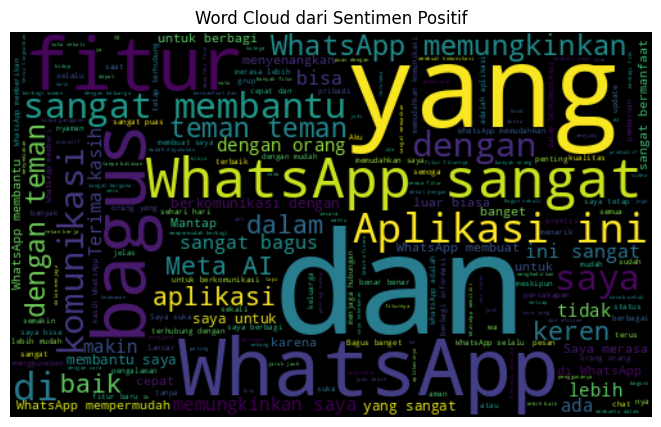

In [25]:
# Filter data untuk sentimen Positif
df_positif = df[df['sentiment'] == 'Positif']

# Gabungkan semua kata dalam ulasan dengan sentimen Positif
all_words_positif = ' '.join([twts for twts in df_positif['content']])

# Buat Word Cloud untuk sentimen Positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

# Tampilkan Word Cloud untuk sentimen Positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')  # Mematikan sumbu
plt.title('Word Cloud dari Sentimen Positif')
plt.show()


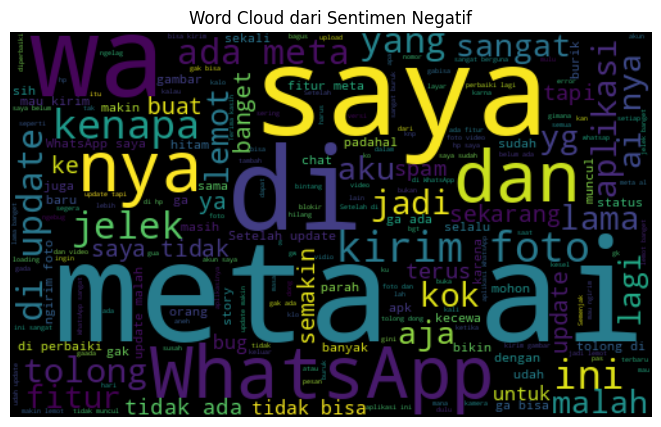

In [26]:
# Filter data untuk sentimen Negatif
df_negatif = df[df['sentiment'] == 'Negatif']

# Gabungkan semua kata dalam ulasan dengan sentimen Negatif
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])

# Buat Word Cloud untuk sentimen Negatif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

# Tampilkan Word Cloud untuk sentimen Negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')  # Mematikan sumbu
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()


In [27]:
temp = df.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentiment,content
0,Negatif,1124
1,Positif,876


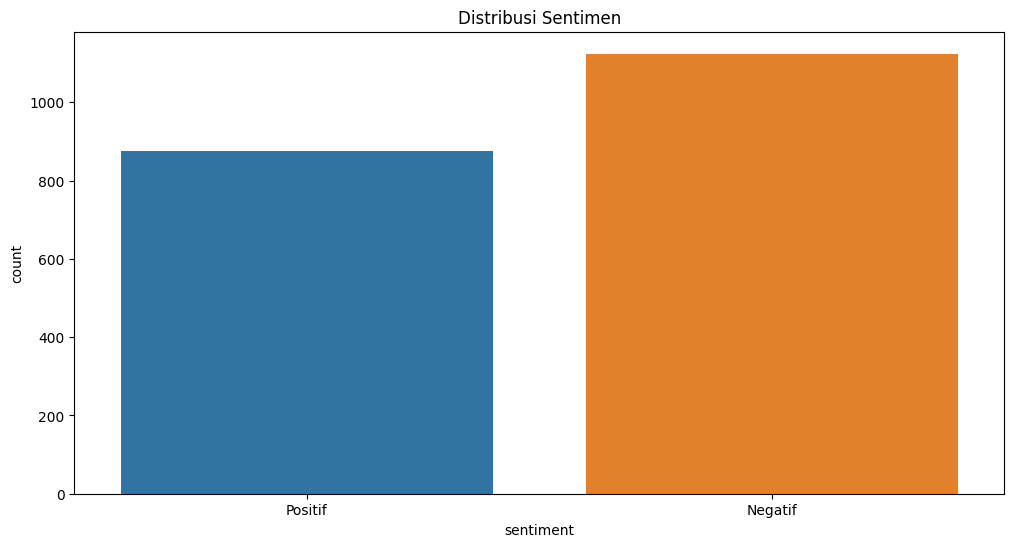

In [28]:
# Pastikan seaborn diimpor
import seaborn as sns
import matplotlib.pyplot as plt

# Plot countplot untuk kolom 'sentimen'
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=df)

# Tampilkan plot
plt.title('Distribusi Sentimen')
plt.show()


In [29]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

In [30]:
!pip install palettable
from palettable.colorbrewer.qualitative import Pastel1_7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.1 MB/s eta 0:00:00:00:01


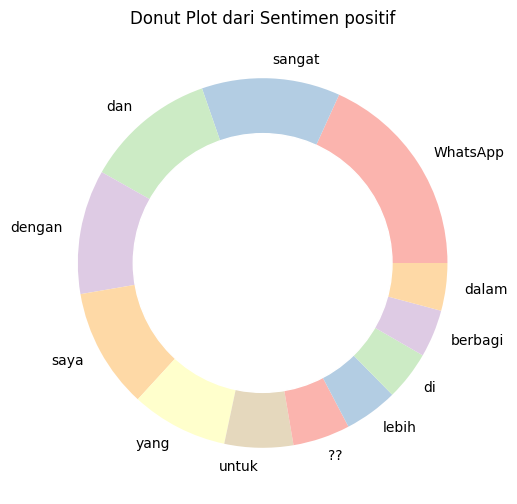

In [31]:
unique_positif_words = df_positif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_positif_words.columns = ['words', 'count']
top_20_words = unique_positif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen positif')
plt.show()

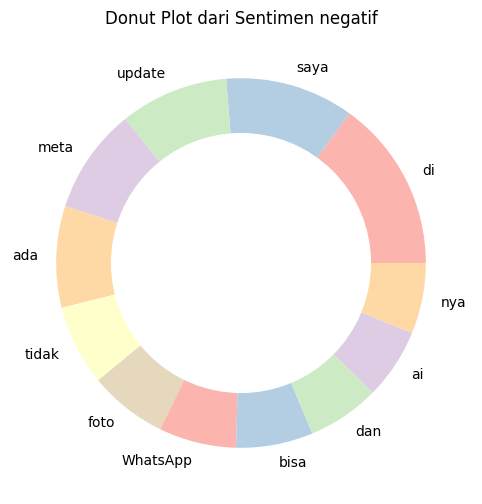

In [32]:
unique_negatif_words = df_negatif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_negatif_words.columns = ['words', 'count']
top_20_words = unique_negatif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen negatif')
plt.show()

In [33]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1600, 2456), (400, 2456))

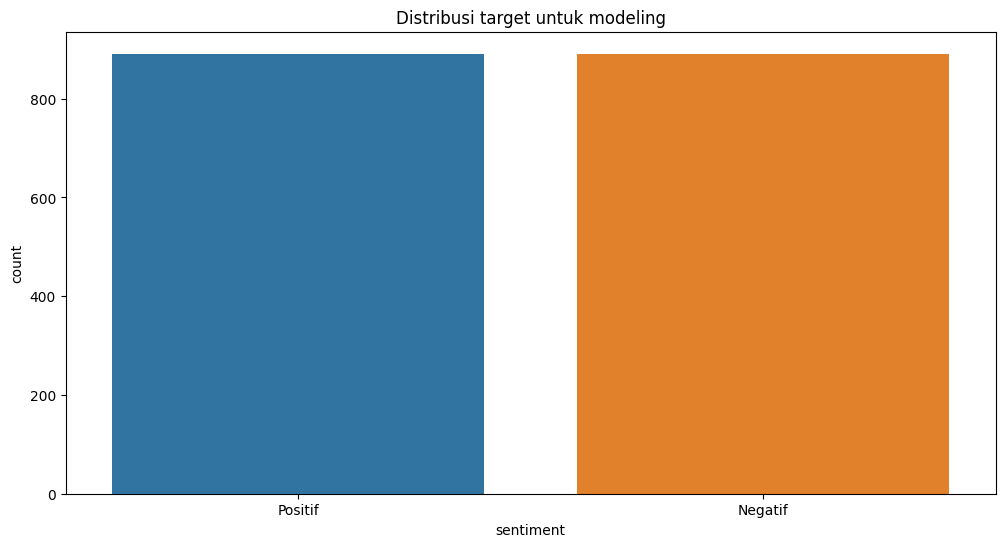

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [35]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
# 4. Melatih Model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [37]:
# Evaluasi Model
y_pred = nb_model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi: 0.89

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.93      0.87      0.90       233
     Positif       0.84      0.91      0.87       167

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

